In [181]:
# some useful mysklearn package import statements and reloads
import importlib
import matplotlib.pyplot as plt
import copy

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

# uncomment once you paste your myclassifiers.py into mysklearn package
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.pokemonDiscretizers
importlib.reload(mysklearn.pokemonDiscretizers)
import mysklearn.pokemonDiscretizers as pokemonDiscretizers

In [182]:
pokemonData = MyPyTable()
completePokemonData = MyPyTable()

pokemonData.load_from_file("pokemon - pokemon.csv")
completePokemonData.load_from_file("pokemon - pokemon.csv")

# pokemonData.pretty_print()
# for i, val in enumerate(pokemonData.column_names):
#     if i > 20:
#         print(i, val)

cols_to_drop = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24, 29, 30, 31, 32, 36, 37, 39]
# abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
#  0,            1,             2,         3,            4,              5,           6,               7,             8,            9,           10,           11             12        13              14           15               16              17             18      19    20              21             22              23        24            25    26                27     28   29            30    31              32           33         34         35    36   37       38          39       40
pokemonData.drop_cols(cols_to_drop)
# for i, val in enumerate(pokemonData.column_names):
#     print(i, val)

# count = 0
# for i, val in enumerate(pokemonData.data):
#     if pokemonData.data[i][-1] == 1.0:
#         count += 1
#         print(val)

# pokemonData.pretty_print()
pokemonData.save_to_file("dropped_pokemon.csv")

### Discretizer Helper

Use the code below to calculate the equal width bin cut offs for each stat discretizer

[5.0, 22.6, 40.2, 57.8, 75.4, 93.0, 110.6, 128.2, 145.8, 163.4, 181.0]
[15, 78, 141, 201, 148, 124, 65, 40, 7, 4]


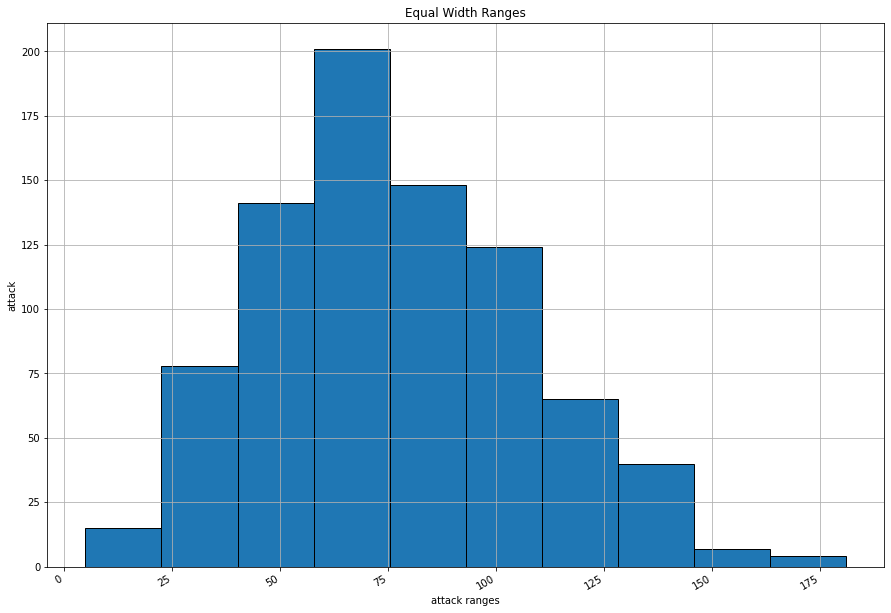

In [183]:
col = pokemonData.get_column("attack")
# for i, val in enumerate(col):
#     print(col)

cutoffs = pokemonDiscretizers.compute_equal_width_cutoffs(col, 10)
print(cutoffs)
# 2. 
freqs = pokemonDiscretizers.compute_bin_frequencies(col, cutoffs)
print(freqs)
# 3.
plt.figure(figsize=(15, 10))
plt.bar(cutoffs[:-1], freqs, width=(cutoffs[1] - cutoffs[0]), edgecolor="black", align="edge")
plt.title("Equal Width Ranges")
plt.xlabel("attack ranges")
plt.ylabel("attack")
plt.xticks(rotation=30, ha="right") # parallel lines
plt.grid(True)
plt.show()

In [184]:
# attack
attack = pokemonData.get_column("attack")
dis_attack = pokemonDiscretizers.attack_discretizer(attack)
attack_index = pokemonData.column_names.index("attack")
# defense
defense = pokemonData.get_column("defense")
dis_defense = pokemonDiscretizers.defense_discretizer(defense)
defense_index = pokemonData.column_names.index("defense")
# hp
hp = pokemonData.get_column("hp")
dis_hp = pokemonDiscretizers.hp_discretizer(hp)
hp_index = pokemonData.column_names.index("hp")
# sp_defense
sp_defense = pokemonData.get_column("sp_defense")
dis_sp_defense = pokemonDiscretizers.sp_defense_discretizer(sp_defense)
sp_defense_index = pokemonData.column_names.index("sp_defense")
# sp_attack
sp_attack = pokemonData.get_column("sp_attack")
dis_sp_attack = pokemonDiscretizers.sp_attack_discretizer(sp_attack)
sp_attack_index = pokemonData.column_names.index("sp_attack")
# speed
speed = pokemonData.get_column("speed")
dis_speed = pokemonDiscretizers.speed_discretizer(speed)
speed_index = pokemonData.column_names.index("speed")
# base_happiness
base_happiness = pokemonData.get_column("base_happiness")
dis_base_happiness = pokemonDiscretizers.base_happiness_discretizer(base_happiness)
base_happiness_index = pokemonData.column_names.index("base_happiness")
# base_total
base_total = pokemonData.get_column("base_total")
dis_base_total = pokemonDiscretizers.base_total_discretizer(base_total)
base_total_index = pokemonData.column_names.index("base_total")
# capture_rate
capture_rate = pokemonData.get_column("capture_rate")
dis_capture_rate = pokemonDiscretizers.capture_rate_discretizer(capture_rate)
capture_rate_index = pokemonData.column_names.index("capture_rate")
# experience_growth
experience_growth = pokemonData.get_column("experience_growth")
dis_experience_growth = pokemonDiscretizers.experience_growth_discretizer(experience_growth)
experience_growth_index = pokemonData.column_names.index("experience_growth")
# height_m
height_m = pokemonData.get_column("height_m")
dis_height_m = pokemonDiscretizers.height_m_discretizer(height_m)
height_m_index = pokemonData.column_names.index("height_m")
# weight_kg
weight_kg = pokemonData.get_column("weight_kg")
dis_weight_kg = pokemonDiscretizers.weight_kg_discretizer(weight_kg)
weight_kg_index = pokemonData.column_names.index("weight_kg")

# type 2 for monotypes
# type2_index = pokemonData.column_names.index("type2")

for i in range(len(pokemonData.data)):
    pokemonData.data[i][attack_index] = dis_attack[i]
    pokemonData.data[i][defense_index] = dis_defense[i]
    pokemonData.data[i][sp_attack_index] = dis_sp_attack[i]
    pokemonData.data[i][sp_defense_index] = dis_sp_defense[i]
    pokemonData.data[i][hp_index] = dis_hp[i]
    pokemonData.data[i][speed_index] = dis_speed[i]
    pokemonData.data[i][height_m_index] = dis_height_m[i]
    pokemonData.data[i][weight_kg_index] = dis_weight_kg[i]
    pokemonData.data[i][base_total_index] = dis_base_total[i]
    pokemonData.data[i][base_happiness_index] = dis_base_happiness[i]
    pokemonData.data[i][capture_rate_index] = dis_capture_rate[i]
    pokemonData.data[i][experience_growth_index] = dis_experience_growth[i]

    # if pokemonData.data[i][type2_index] == "":
    #     pokemonData.data[i][type2_index] = "null"


pokemonData.pretty_print()  


  attack    base_happiness    base_total    capture_rate    defense    experience_growth    height_m    hp    sp_attack    sp_defense    speed    weight_kg    is_legendary
--------  ----------------  ------------  --------------  ---------  -------------------  ----------  ----  -----------  ------------  -------  -----------  --------------
       2                 2             2               1          1                    3           1     1            2             2        2            1               0
       2                 2             3               1          2                    3           1     2            3             2        2            1               0
       3                 2             4               1          2                    3           1     2            3             2        2            1               0
       2                 2             2               1          1                    3           1     1            2             1       

In [185]:
X = pokemonData.data
y = []

for i in range(len(X)):
    val = str(int(X[i][-1]))
    y.append(val)
    del X[i][-1]

# print(X)
# print(y)
X_train_folds_1, X_test_folds_1 = myevaluation.stratified_kfold_cross_validation(X, y, 5)

In [186]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyDummyClassifier()

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for i in range(len(y_test)):
        sk_fold_y_true.append(y_test[i])
        sk_fold_y_pred.append(y_pred[i])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.basketball_titanic_helper("Dummy Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)

Accuracy =  0.888 , Error rate = 0.112
Precision =  0.444 , Recall  = 0.5 , F1  = 0.47
Dummy Classifier (Stratified 10 Fold Cross Validation):

 BASKETBALL     A   H   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  731    0      731              100.0
            1   92    0       92                0.0


In [187]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyNaiveBayesClassifier()

    classifier.fit(X_train, y_train)
    # print(X_test)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Naive Bayes Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)    

Accuracy =  0.954 , Error rate = 0.046
Precision =  0.494 , Recall  = 0.48 , F1  = 0.487
Naive Bayes Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  702   29      731              96.03
            1    9   83       92              90.22
['Lapras', 'Dragonite', 'Gardevoir', 'Greninja', 'Kommo-o', 'Articuno', 'Raikou', 'Celebi', 'Latios', 'Deoxys', 'Palkia', 'Manaphy', 'Cobalion', 'Reshiram', 'Meloetta', 'Tapu Bulu', 'Lunala', 'Marshadow', 'Zeraora', 'Eternatus', 'Aerodactyl', 'Salamence', 'Mamoswine', 'Haxorus', 'Volcarona', 'Zapdos', 'Entei', 'Regirock', 'Kyogre', 'Uxie', 'Heatran', 'Darkrai', 'Terrakion', 'Zekrom', 'Genesect', 'Hoopa', 'Tapu Fini', 'Nihilego', 'Kartana', 'Glastrier', 'Enamorus', 'Exeggutor', 'Snorlax', 'Slaking', 'Torterra', 'Rhyperior', 'Moltres', 'Suicune', 'Regice', 'Groudon', 'Mesprit', 'Regigigas', 'Shaymin', 'Virizion', 'Landorus', 'Xerneas', 

In [188]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # do the classifying
    classifier = MyDecisionTreeClassifier()

    classifier.fit(X_train, y_train)
    # classifier.print_decision_rules()
    y_pred = classifier.predict(X_test, [['0', 0], ['1', 0]])

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])
        elif y_pred[j] is None:
            print(completePokemonData.data[X_test_folds_1[i][j]][nameIndex], end=" ")

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))
# print(sk_fold_y_pred)
# # temp fix
# for i, val in enumerate(sk_fold_y_pred):
#     if val is None:
#         sk_fold_y_pred[i] = "0"

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Decision Tree Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)


    

Accuracy =  0.942 , Error rate = 0.058
Precision =  0.483 , Recall  = 0.485 , F1  = 0.484
Decision Tree Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  709   22      731              96.99
            1   26   66       92              71.74
['Mantine', 'Larvesta', 'Kommo-o', 'Articuno', 'Celebi', 'Latios', 'Palkia', 'Manaphy', 'Reshiram', 'Meloetta', 'Lunala', 'Marshadow', 'Zeraora', 'Eternatus', 'Regidrago', 'Aerodactyl', 'Volcarona', 'Mudsdale', 'Zapdos', 'Regirock', 'Kyogre', 'Uxie', 'Darkrai', 'Zekrom', 'Genesect', 'Hoopa', 'Nihilego', 'Kartana', 'Glastrier', 'Enamorus', 'Snorlax', 'Slaking', 'Beldum', 'Luxio', 'Sliggoo', 'Moltres', 'Groudon', 'Mesprit', 'Regigigas', 'Shaymin', 'Landorus', 'Xerneas', 'Guzzlord', 'Melmetal', 'Spectrier', 'Metang', 'Garchomp', 'Vanilluxe', 'Eelektross', 'Jangmo-o', 'Mewtwo', 'Lugia', 'Rayquaza', 'Azelf', 'Giratina', 'Arceus', 'Torna

In [189]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # reconnect X_train and y_train
    connected_data = []
    # print(X_train)
    for j in range(len(X_train)):
        temp = copy.deepcopy(X_train[j])
        # print(temp)
        temp.append(y_train[j])
        connected_data.append(temp)
    # do the classifying
    classifier = MyRandomForestClassifier(30, 7, 10)

    classifier.fit(connected_data, 12, [['0', 0], ['1', 0]])
    # classifier.print_decision_rules()
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])
        elif y_pred[j] is None:
            print(completePokemonData.data[X_test_folds_1[i][j]][nameIndex], end=" ")

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))
# print(sk_fold_y_pred)
# # temp fix
# for i, val in enumerate(sk_fold_y_pred):
#     if val is None:
#         sk_fold_y_pred[i] = "0"

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Decision Tree Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)


    

Accuracy =  0.95 , Error rate = 0.05
Precision =  0.483 , Recall  = 0.49 , F1  = 0.486
Decision Tree Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  716   15      731              97.95
            1   26   66       92              71.74
['Dragonite', 'Kommo-o', 'Articuno', 'Celebi', 'Latios', 'Deoxys', 'Palkia', 'Manaphy', 'Cobalion', 'Reshiram', 'Meloetta', 'Lunala', 'Marshadow', 'Zeraora', 'Eternatus', 'Aerodactyl', 'Volcarona', 'Zapdos', 'Kyogre', 'Uxie', 'Heatran', 'Darkrai', 'Zekrom', 'Genesect', 'Hoopa', 'Nihilego', 'Kartana', 'Glastrier', 'Enamorus', 'Snorlax', 'Slaking', 'Moltres', 'Groudon', 'Mesprit', 'Regigigas', 'Landorus', 'Xerneas', 'Guzzlord', 'Melmetal', 'Urshifu', 'Garchomp', 'Vanilluxe', 'Eelektross', 'Type: Null', 'Mewtwo', 'Lugia', 'Rayquaza', 'Azelf', 'Giratina', 'Arceus', 'Tornadus', 'Kyurem', 'Yveltal', 'Tapu Koko', 'Pheromosa', 'Necrozma', 'St

In [197]:
accuracy_total = 0
precision_total = 0
recall_total = 0
f1_total = 0
accuracy_count = 0

total_preds = 0

# save these for confusion matrix
sk_fold_y_true = []
sk_fold_y_pred = []

labels = ["0", "1"]
k = 10
digits = 3

nameIndex = completePokemonData.column_names.index("name")
nameLegendPreds = []

# print(X_train_folds_1)
# print(X_test_folds_1)

for i in range(len(X_train_folds_1)):
    # build up the X_train, X_test, y_train, y_test
    X_train = [X[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]
    y_train = [y[X_train_folds_1[i][j]] for j in range(len(X_train_folds_1[i]))]

    X_test = [X[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]
    y_test = [y[X_test_folds_1[i][j]] for j in range(len(X_test_folds_1[i]))]

    # need to drop attributes from knn, otherwise it's too slow
    # get down to just 6
    # running with attack, defense, base_total, capture_rate, experience_growth
    # currently have attack, base_happiness, base_total, capture_rate, defense, experience_growth, height_m, hp, sp_attack, sp_defense, speed, weight_kg
    # so keep 0, 2, 3, 4, 5
    keep = [0,1, 2, 3, 4, 5]
    for j,val in enumerate(X_train):
        temp_copy = []
        for index in keep:
            temp_copy.append(val[index])
        X_train[j] = temp_copy

    for j,val in enumerate(X_test):
        temp_copy = []
        for index in keep:
            temp_copy.append(val[index])
        X_test[j] = temp_copy
    # print(X_test)

    # do the classifying
    classifier = MyKNeighborsClassifier()

    classifier.fit(X_train, y_train)
    # print(X_test)
    y_pred = classifier.predict(X_test)

    accuracy_total += myevaluation.accuracy_score(y_test, y_pred, normalize=False)
    precision_total += myevaluation.binary_precision_score(y_test, y_pred)
    recall_total += myevaluation.binary_recall_score(y_test, y_pred)
    f1_total += myevaluation.binary_f1_score(y_test, y_pred)
    accuracy_count += myevaluation.accuracy_score(y_test, y_pred, normalize=False)

    # append preds
    for q in range(len(y_test)):
        sk_fold_y_true.append(y_test[q])
        sk_fold_y_pred.append(y_pred[q])
    
    # print legend predicts
    for j in range(len(X_test_folds_1[i])):
        if y_pred[j] == "1":
            nameLegendPreds.append(completePokemonData.data[X_test_folds_1[i][j]][nameIndex])

    total_preds += len(y_test)

print("Accuracy = ", round((accuracy_total / total_preds ), ndigits=digits), ", Error rate =", round(1 - round((accuracy_total / total_preds ), ndigits=digits), ndigits=digits))

print("Precision = ", round((precision_total / k ), ndigits=digits), ", Recall  =", round((recall_total / k ), ndigits=digits), ", F1  =", round((f1_total / k ), ndigits=digits))

matrix = myevaluation.confusion_matrix(sk_fold_y_true, sk_fold_y_pred, labels)
myutils.pokemon_matrix_print_helper("Knn Classifier (Stratified 10 Fold Cross Validation)", matrix, labels)
print(nameLegendPreds)    

Accuracy =  0.957 , Error rate = 0.043
Precision =  0.486 , Recall  = 0.49 , F1  = 0.488
Knn Classifier (Stratified 10 Fold Cross Validation):

Pokemon Legend  0    1   Total    Recognition (%)
_____________  ___  ___  _______  _________________
            0  717   14      731              98.08
            1   21   71       92              77.17
['Dragonite', 'Gardevoir', 'Articuno', 'Raikou', 'Celebi', 'Deoxys', 'Palkia', 'Cobalion', 'Reshiram', 'Meloetta', 'Lunala', 'Celesteela', 'Marshadow', 'Zeraora', 'Eternatus', 'Regidrago', 'Salamence', 'Haxorus', 'Zapdos', 'Entei', 'Regirock', 'Kyogre', 'Uxie', 'Heatran', 'Darkrai', 'Terrakion', 'Zekrom', 'Genesect', 'Hoopa', 'Tapu Fini', 'Nihilego', 'Glastrier', 'Enamorus', 'Slaking', 'Moltres', 'Suicune', 'Regice', 'Groudon', 'Mesprit', 'Regigigas', 'Virizion', 'Xerneas', 'Volcanion', 'Buzzwole', 'Guzzlord', 'Naganadel', 'Melmetal', 'Spectrier', 'Gallade', 'Goodra', 'Type: Null', 'Mewtwo', 'Lugia', 'Registeel', 'Rayquaza', 'Azelf', 'Giratin